# Feature Importance : Permutation based

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

## Train-test split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [4]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Model Accuracy

In [5]:
print("Model Accuracy:", model.score(X_test, y_test))

Model Accuracy: 1.0


## Permutation Importance

In [6]:
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=20, random_state=42)


## Feature Importance

In [7]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance_Mean': perm_importance.importances_mean,
    'Importance_STD': perm_importance.importances_std
}).sort_values(by='Importance_Mean', ascending=False)

print("\nPermutation Feature Importance:")
print(feature_importance)


Permutation Feature Importance:
             Feature  Importance_Mean  Importance_STD
2  petal length (cm)         0.248333        0.074143
3   petal width (cm)         0.216667        0.052175
0  sepal length (cm)         0.000000        0.000000
1   sepal width (cm)         0.000000        0.000000


## Visualization

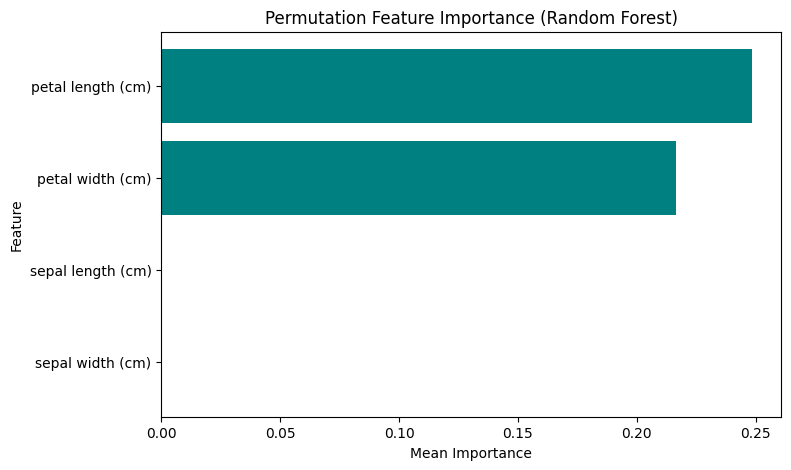

In [8]:
plt.figure(figsize=(8, 5))
plt.barh(feature_importance['Feature'], feature_importance['Importance_Mean'], color='teal')
plt.xlabel("Mean Importance")
plt.ylabel("Feature")
plt.title("Permutation Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()